## Entregable Actividad 

- **Fuente de atos** https://rndc.mintransporte.gov.co/MenuPrincipal/tabid/204
- **Intro** Sobre la dataSet seleccionada identificar los valores y poder aplicar tecnica de imputacion, resolver problemas de outliers.
- **Objetivo principal** Realizar limpieza de problemas (outhlers, duplicados, valores nulos)

In [12]:

## Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os   
warnings.filterwarnings("ignore")

## Data Extraction 

In [13]:
## Carga y lectura de datos
data = pd.read_csv("Data_rndc_year_2024.csv", sep = ";", encoding = "utf-8")
data.head(1000)

,Item,Fecha,Sucursal,Origen,Destino,Nit,Cliente,Categoria,Orden de Servicio,Doc. Cliente,...,Nit REmite,Nombre Remite,Direccion Remite,DANE Remite,Nit Destino,Nombre Destino,Direccion Destino,DANE Destino,Razon,Observaciones Conductor - Vehículo
0,1,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5835,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
1,2,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5836,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
2,3,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5837,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
3,4,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5838,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
4,5,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5839,H5001,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8/01/2024,OPAV IBAGUE,IBAGUE,IBAGUE,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S,NaN,6119,2000,...,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,DISTRIBUCIÃ“N IBAGUE,73001,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,IBAGUE TOLIMA,73001,NaN,-
996,997,9/01/2024,OPAV IBAGUE,IBAGUE,IBAGUE,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S,NaN,6120,2000,...,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,DISTRIBUCIÃ“N IBAGUE,73001,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,IBAGUE TOLIMA,73001,NaN,-
997,998,9/01/2024,OPAV IBAGUE,IBAGUE,IBAGUE,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S,NaN,6121,2000,...,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,DISTRIBUCIÃ“N IBAGUE,73001,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,IBAGUE TOLIMA,73001,NaN,-
998,999,10/01/2024,OPAV IBAGUE,IBAGUE,IBAGUE,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S,NaN,6236,2000,...,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,DISTRIBUCIÃ“N IBAGUE,73001,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S IBAGUE,IBAGUE TOLIMA,73001,NaN,-


In [14]:
data

,Item,Fecha,Sucursal,Origen,Destino,Nit,Cliente,Categoria,Orden de Servicio,Doc. Cliente,...,Nit REmite,Nombre Remite,Direccion Remite,DANE Remite,Nit Destino,Nombre Destino,Direccion Destino,DANE Destino,Razon,Observaciones Conductor - Vehículo
0,1,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5835,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
1,2,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5836,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
2,3,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5837,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
3,4,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5838,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
4,5,2/01/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,5839,H5001,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18561,18562,31/12/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,25661,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
18562,18563,31/12/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,25663,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
18563,18564,31/12/2024,ATA BOGOTA,BOGOTA,BOGOTA,900294923,AVICOLA TRIPLE A S.A.S,NaN,25662,H5000,...,9002949239,AVICOLA TRIPLE A S.A.S.,Boyaca calle 13,11001,9002949239,AVICOLA TRIPLE A S.A.S,CALLE 18 69F 86,11001,NaN,-
18564,18565,31/12/2024,OPAV TOCANCIPA,TOCANCIPA,TOCANCIPA,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S,NaN,25707,5874,...,891401858,OPERADORA AVICOLA DE COLOMBIA S.A.S TOCANCIPA,Parque Industrial del Norte,25817,8914018586,OPERADORA AVICOLA DE COLOMBIA S.A.S TOCANCIPA,DISTRIBUCIÃ“N TOCANCIPA,25817,NaN,-


In [15]:
data.shape

(18566, 85)

In [16]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 85 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Item                                18566 non-null  int64  
 1   Fecha                               18566 non-null  object 
 2   Sucursal                            18566 non-null  object 
 3   Origen                              18566 non-null  object 
 4   Destino                             18566 non-null  object 
 5   Nit                                 18566 non-null  int64  
 6   Cliente                             18566 non-null  object 
 7   Categoria                           0 non-null      float64
 8   Orden de Servicio                   18566 non-null  int64  
 9   Doc. Cliente                        18565 non-null  object 
 10  Doc. Cliente 2                      18562 non-null  object 
 11  Mercancia                           18566

(   Item      Fecha    Sucursal  Origen Destino        Nit  \
 0     1  2/01/2024  ATA BOGOTA  BOGOTA  BOGOTA  900294923   
 1     2  2/01/2024  ATA BOGOTA  BOGOTA  BOGOTA  900294923   
 2     3  2/01/2024  ATA BOGOTA  BOGOTA  BOGOTA  900294923   
 3     4  2/01/2024  ATA BOGOTA  BOGOTA  BOGOTA  900294923   
 4     5  2/01/2024  ATA BOGOTA  BOGOTA  BOGOTA  900294923   
 
                   Cliente  Categoria  Orden de Servicio Doc. Cliente  ...  \
 0  AVICOLA TRIPLE A S.A.S        NaN               5835        H5000  ...   
 1  AVICOLA TRIPLE A S.A.S        NaN               5836        H5000  ...   
 2  AVICOLA TRIPLE A S.A.S        NaN               5837        H5000  ...   
 3  AVICOLA TRIPLE A S.A.S        NaN               5838        H5000  ...   
 4  AVICOLA TRIPLE A S.A.S        NaN               5839        H5001  ...   
 
    Nit REmite            Nombre Remite  Direccion Remite DANE Remite  \
 0  9002949239  AVICOLA TRIPLE A S.A.S.   Boyaca calle 13       11001   
 1  900294

## Etapa Hipotesis 

Posibles hipótesis a explorar:

Relación entre peso y costos de orden

**¿Los envíos más pesados tienden a ser más costosos?**
Impacto de la distancia en el costo del flete

¿Existe una correlación entre la distancia entre el origen y el destino y el costo del flete?
Tiempos de entrega y retrasos

¿Hay retrasos frecuentes en la entrega? ¿Dependen de la ruta, conductor o tipo de vehículo?
Efecto del tipo de vehículo en el costo del servicio

¿Los diferentes tipos de vehículos generan costos significativamente distintos en los envíos?
Rentabilidad de los pedidos

¿Cuántos pedidos tienen costos que superan los ingresos, generando pérdidas?
Facturación y pagos

¿Cuántos pedidos no han sido facturados? ¿Hay retrasos en los pagos?
Impacto del peso en la entrega

¿Los pedidos más pesados tienen un mayor tiempo de entrega?
Influencia del seguro en los costos totales

¿Los envíos con seguro son significativamente más rentables?

In [46]:
## Seleccion de variables
df = data[['Fecha','Sucursal','Modalidad','Origen','Destino','Mercancia','Peso','Placa','Tipo Veh.','Valor Orden','Costo Orden','Rentabilidad','Rentabilidad %','Fecha Factura','Factura','Orden de Servicio','Inicio Viaje','Fin de Viaje']]
df

,Fecha,Sucursal,Modalidad,Origen,Destino,Mercancia,Peso,Placa,Tipo Veh.,Valor Orden,Costo Orden,Rentabilidad,Rentabilidad %,Fecha Factura,Factura,Orden de Servicio,Inicio Viaje,Fin de Viaje
0,2/01/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1353.0,WEP829,LUV,250000.0,190000.0,60000,24%,0000-00-00,NaN,5835,NaN,NaN
1,2/01/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1155.0,UPS536,LUV,250000.0,190000.0,60000,24%,0000-00-00,NaN,5836,NaN,NaN
2,2/01/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1157.0,TBZ881,NHR,250000.0,190000.0,60000,24%,0000-00-00,NaN,5837,NaN,NaN
3,2/01/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1352.0,TRK045,NHR,250000.0,190000.0,60000,24%,0000-00-00,NaN,5838,NaN,NaN
4,2/01/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1111.0,JVK609,NHR,250000.0,190000.0,60000,24%,0000-00-00,NaN,5839,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18561,31/12/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1541.0,JVK625,NHR,314700.0,242000.0,72700,23.1 %,0000-00-00,NaN,25661,31/12/2024,0000-00-00
18562,31/12/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1187.0,THV286,LUV,273200.0,205000.0,68200,25%,0000-00-00,NaN,25663,31/12/2024,0000-00-00
18563,31/12/2024,ATA BOGOTA,Urbano,BOGOTA,BOGOTA,HUEVOS DE AVES CON CASCARA,1438.0,SKX124,NHR,314700.0,242000.0,72700,23.1 %,0000-00-00,NaN,25662,31/12/2024,0000-00-00
18564,31/12/2024,OPAV TOCANCIPA,Urbano,TOCANCIPA,TOCANCIPA,POLLO FRESCO,1800.0,NOW663,NHR,427434.0,330000.0,97434,22.8 %,0000-00-00,NaN,25707,31/12/2024,0000-00-00


In [27]:
## verificacion de nulos en el dataset
df.isnull().sum()

Fecha                   0
Sucursal                0
Modalidad               0
Origen                  0
Destino                 0
Mercancia               0
Peso                    0
Placa                   0
Tipo Veh.               0
Valor Orden             0
Costo Orden             0
Rentabilidad            0
Rentabilidad %          0
Fecha Factura           0
Factura              3122
Orden de Servicio       0
dtype: int64

In [ ]:
## Categoria por tipo de vehiculos
df["Tipo Veh."].unique()

array(['LUV', 'NHR', 'SLL', 'NKR', 'NPR'], dtype=object)

In [36]:
## Categoria por rentabilidad %%
df["Rentabilidad %"].unique()

array(['24%', '17.6 %', '20%', ..., '-143.1 %', '-127.7 %', '-94.4 %'],
      dtype=object)

In [37]:
## Convertir la columna en un valor numerico 
df["Rentabilidad %"] = df["Rentabilidad %"].str.replace("%","").astype(float)

In [38]:
## Definir categorias por rentabilidad
def categorizar_rentabilidad(porcentaje):
    if porcentaje < 0:
        return "No rentable"
    elif 0 <= porcentaje <= 10:
        return "Baja rentabilidad"
    elif 10 < porcentaje <= 30:
        return "Rentabilidad media"
    else:
        return "Alta rentabilidad"

In [39]:
# Aplicar la función a la columna
df["Categoria Rentabilidad"] = df["Rentabilidad %"].apply(categorizar_rentabilidad)


In [40]:
# Mostrar la distribución de las categorías
df["Categoria Rentabilidad"].value_counts()

Categoria Rentabilidad
Rentabilidad media    13744
No rentable            2230
Alta rentabilidad      1693
Baja rentabilidad       899
Name: count, dtype: int64

In [ ]:
# distribución en porcentaje
rentabilidad_percent = df["Categoria Rentabilidad"].value_counts(normalize=True) * 100
rentabilidad_percent

Categoria Rentabilidad
Rentabilidad media    74.027793
No rentable           12.011203
Alta rentabilidad      9.118819
Baja rentabilidad      4.842185
Name: proportion, dtype: float64

## Imputacion sensible 

In [ ]:
# Verificar el porcentaje de valores nulos por columna
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

In [49]:
# Filtrar solo las columnas con valores nulos
missing_data = pd.DataFrame({"Valores Nulos": missing_values, "Porcentaje (%)": missing_percentage})
missing_data = missing_data[missing_data["Valores Nulos"] > 0].sort_values(by="Porcentaje (%)", ascending=False)
missing_data

,Valores Nulos,Porcentaje (%)
Factura,3122,16.815685


In [48]:
# Eliminar columnas con 100% de valores nulos
cols_to_drop = missing_data[missing_data["Porcentaje (%)"] == 100].index
df_cleaned = data.drop(columns=cols_to_drop)

# Imputar fechas con forward fill (rellenar con el último valor válido)
df_cleaned["Inicio Viaje"] = df_cleaned["Inicio Viaje"].fillna(method="ffill")
df_cleaned["Fin de Viaje"] = df_cleaned["Fin de Viaje"].fillna(method="ffill")

# Imputar valores numéricos con la mediana
df_cleaned["Anticipo"] = df_cleaned["Anticipo"].fillna(df_cleaned["Anticipo"].median())

# Imputar valores categóricos con "No Disponible"
df_cleaned["Factura"] = df_cleaned["Factura"].fillna("No Disponible")
df_cleaned["Doc. Cliente"] = df_cleaned["Doc. Cliente"].fillna("No Disponible")
df_cleaned["Doc. Cliente 2"] = df_cleaned["Doc. Cliente 2"].fillna("No Disponible")

# Verificar nuevamente los valores nulos después de la imputación
missing_after = df_cleaned.isnull().sum().sum()
missing_after

np.int64(197814)

## Graficar

In [52]:
# Verificar nuevamente los valores nulos por columna después de la imputación
missing_after_values = df_cleaned.isnull().sum()
missing_after_percentage = (missing_after_values / len(df_cleaned)) * 100

# Filtrar solo columnas con valores nulos restantes
missing_after_data = pd.DataFrame({"Valores Nulos": missing_after_values, "Porcentaje (%)": missing_after_percentage})
missing_after_data = missing_after_data[missing_after_data["Valores Nulos"] > 0].sort_values(by="Porcentaje (%)", ascending=False)


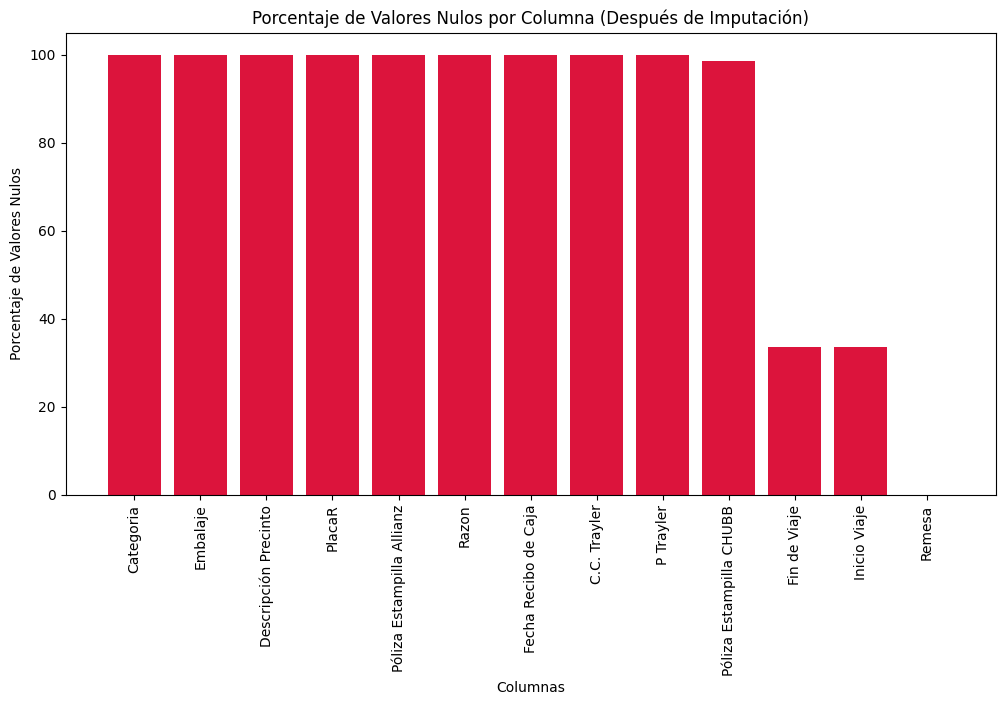

In [62]:
import matplotlib.pyplot as plt

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(missing_after_data.index, missing_after_data["Porcentaje (%)"], color="crimson")

# Agregar etiquetas y título
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de Valores Nulos")
plt.title("Porcentaje de Valores Nulos por Columna (Después de Imputación)")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()